In [16]:
from symai import *

### Getting Started by running OS Commands

In [17]:
from symai.extended.os_command import OSCommand

In [18]:
oscmd = OSCommand(programs=[r"C:\Users\Xpitfire\AppData\Roaming\Spotify\Spotify.exe"],
                  metadata={'track': 'https://open.spotify.com/track/4onvDep8OyHKT85RBO3b4V?si=acf7cd767bed4336'})

Running APPs on your PC via natrual language processing:

In [19]:
oscmd('Play a song on Spotify');

Executing Windows-10-10.0.22621-SP0 command: Start-Process 'spotify:https://open.spotify.com/track/4onvDep8OyHKT85RBO3b4V?si=acf7cd767bed4336'


In [23]:
oscmd('Open a colouring tool');

Executing Windows-10-10.0.22621-SP0 command: Sorry, not supported.


### Create Custom Functions and Process Documents

In [24]:
fn = Function('Extract the person mentioned in the document')

In [25]:
reader = FileReader()

In [26]:
pdf = reader(r"C:\Users\Xpitfire\Downloads\archive\Resume_v10_online.pdf")

In [27]:
print(pdf.value[:1000])

marius-constantin | dinu résumé
employmentResearch Scientist
dinu.marius-constantin@hotmail.com  
www.dinu.at
publications
skills
Java 90%
C# / .NET 80%
C / C++ 40%
Python 90%
Reinforcement Learning 90%
Machine Learning / Deep Learning 90% Pytorch / TensorFlow 70%HTML5 / PHP / jQuery / CSS3 / LESS 70%XML / XPath / XQuery 70%
SQL/NoSQL 70%
JavaScript / TypeScript 80%
Unity / Unreal Engine 20%
R / Mathematica 30%October 2021 - present
Dynatrace, Inc.
Position:  Senior Research Scientist (Linz, AT)
Expertise:  Reinforcement Learning / Deep Learning / Natural Language Processing
Research and development of algorithms for large-scale cloud-based high-perfor -
mance computing platforms, with focus on log analytics, anomaly detection, re -
al-time root cause analysis and recommendation systems. Publications at top-tier 
machine learning conferences (NeurIPS, ICML, CoLLAs or similar).
September 2019 - September 2021
Johannes Kepler University
Position:  Research Scientist (Linz, AT)
Expertise:

In [28]:
res = fn(pdf)

In [29]:
print(res)

The person mentioned in the document is Marius-Constantin Dinu.


In [30]:
res.extract('return only last name')

<class 'symai.symbol.Symbol'>(value=Dinu)

### Transform Data from one format to another

In [31]:
json_ = {"jobs": [
    { "{job1}": "string" },
    { "{job2}": "string" }
]}

parser = JsonParser("Extract Job positions and hiring years from the document", 
                    json_)

In [32]:
res = parser(pdf)

In [33]:
print(res)

{'jobs': "[{'Senior Research Scientist': 'October 2021 - Present'}, {'Research Scientist': 'September 2019 - September 2021'}, {'Data Scientist': 'October 2016 – August 2019'}, {'CEO / Software Architect': 'May 2018 – December 2018'}, {'Mobile App Developer': 'August 2016 – September 2016'}, {'Software Developer Internship': 'April 2016 – June 2016'}, {'Software Architect and Product Manager': 'December 2010 – March 2016'}]"}


### Finding information in large Documents

In [34]:
from symai.extended import DocumentRetriever

Index large documents and search their content:

In [35]:
retriever = DocumentRetriever(file_path=r"C:\Users\Xpitfire\Downloads\archive\GPT4_paper_2303.08774.pdf",
                              index_name="gpt4")

100%|██████████| 8/8 [00:15<00:00,  1.95s/it]


In [36]:
retriever('what is the conclusion of the paper?')

<class 'symai.symbol.Symbol'>(value=The authors conclude that fine-tuning large language models with human feedback is a promising way to align the models with human intent. This method, used to train InstructGPT, showed improvements in truthfulness and reductions in toxic output generation, demonstrating its efficacy.)

In [37]:
retriever('what is the abstract about?')

<class 'symai.symbol.Symbol'>(value=The abstract is about the evaluation of GPT-4, a language model developed by OpenAI. It discusses the performance of GPT-4 in solving various tasks, including multiple-choice and free-response questions, across different domains. Some challenges, like lack of consistency in model responses and the ability to mimic human falsehoods, are also mentioned. The abstract further discusses attempts at improving the model, including adversarial training methods and evaluation schemes. It provides details about various related research publications, preprints, and even refers to different versions of the model like GPT-3.5.)

### Multi-Modal Document Processing

In [38]:
ocr = Interface('ocr')
audio = Interface('whisper')

<img src="https://sfs.mit.edu/wp-content/uploads/2021/05/Bill-No-COVID-grant-copy.png" style="width: 700px">

In [39]:
bill = ocr("https://sfs.mit.edu/wp-content/uploads/2021/05/Bill-No-COVID-grant-copy.png")

In [40]:
print(bill)

{'lang': 'en', 'all_text': 'Student ID:\nStudent Name:\nTerm:\nTERM\nSpring 2021\nSpring 2021\nDATE\nSpring 2021\n01-06-2021\n01-06-2021\n01-06-2021\n01-08-2021\n01-07-2021\n01-07-2021\nStudent Billing Statement\nDESCRIPTION\n* PREVIOUS BILLED BALANCE *\n--CURRENT CHARGES--\nSpring Any 14 Meal Plan Purcha\nUndergraduate Housing Spring R\nExtended Insurance - Student\nRegular Undergraduate Tuition\nStatement Date:\nAmount Due:\nDue Date:\n* CURRENT BILLED BALANCE *\n--MEMOED FINANCIAL AID--\nOutside Scholarship\nMIT Scholarship\n** MEMO FINAID BALANCE **\nAmount Due\nJan 11, 2021\n$6,170.00\nFeb 01, 2021\nCHARGES\n$0.00\n$1,900.00\n$5,500.00\n$1,907.00\n$26,725.00\n$36,032.00\n$6,170.00\nCREDITS\n$2,500.00\n$27,362.00\n$29,862.00', 'annotations': "['Student', 'ID', ':', 'Student', 'Name', ':', 'Term', ':', 'TERM', 'Spring', '2021', 'Spring', '2021', 'DATE', 'Spring', '2021', '01-06-2021', '01-06-2021', '01-06-2021', '01-08-2021', '01-07-2021', '01-07-2021', 'Student', 'Billing', 'Statem

In [41]:
fn = Function('What is the amount due?')

In [42]:
res = fn(bill)

In [43]:
print(res)

The amount due is $6,170.00.


In [44]:
import IPython; IPython.display.Audio(r"C:\Users\Xpitfire\Downloads\archive\Armin Wolf English Transcript_v4.mp3")

In [45]:
interview = audio(r"C:\Users\Xpitfire\Downloads\archive\Armin Wolf English Transcript_v4.mp3")

In [46]:
interview.query('What is the topic about?')

<class 'symai.symbol.Symbol'>(value=The topic is about potential military conflicts, specifically between India and Pakistan, and China's potential military intervention in Taiwan.)

In [47]:
print(interview)

Does the world have to be concerned that there will be a war between India and Pakistan? But has the world to be concerned about the future war between India and Pakistan? Okay, let's change this object. You frequently said that India has a very complicated relationship with your neighbouring China. Many people around the world are quite concerned that China might in the near future intervene militarily in Taiwan. Do you share this concern?


In [48]:
interview.translate('Mandarin')

<class 'symai.symbol.Symbol'>(value=世界是否需要关心印度和巴基斯坦之间是否会爆发战争？但是世界是否需要为印度和巴基斯坦未来的战争操心？好的，让我们换个话题。你经常说印度与你们的邻国中国的关系非常复杂。全世界的很多人都非常担心中国可能会在不久的将来对台湾进行军事干预。你是否也有这样的担忧？)

In [49]:
interview.extract('what asian countries are mentioned?')

<class 'symai.symbol.Symbol'>(value=India | Pakistan | China | Taiwan)

### Visualize Graph Data

In [50]:
from symai.extended import Graph
from symai.formatter import ParagraphFormatter
graph = Graph(formatter=ParagraphFormatter(), verbose=True)

Process a text in graph format and visualize it:

In [51]:
csv = graph(interview)

Does the world have to be concerned that there will be a war between India and Pakistan? But has the world to be concerned about the future war between India and Pakistan? Okay, let's change this object. You frequently said that India has a very complicated relationship with your neighbouring China. Many people around the world are quite concerned that China might in the near future intervene militarily in Taiwan. Do you share this concern?



In [52]:
print(csv)

source,target,value
world, war, 2
India, Pakistan, 2
India, China, 1
China, Taiwan, 1



In [53]:
import json
with open('apikeyfile.json', 'r') as f:
    graphistry_key = json.load(f)

In [54]:
graphviz = Import('ExtensityAI/graphistry', 
                  username=graphistry_key['username'], 
                  password=graphistry_key['password'])

In [55]:
res = graphviz(csv)

DEBUG:root:@PyGraphistry login : org_name :None vs PyGraphistry.org_name() : xpitfireDEBUG:root:@ArrowUploader.__init__: There is an org_name : xpitfireDEBUG:root:2. @ArrowUploader.__init__: After set self.org_name: xpitfire, self.__org_name : xpitfireDEBUG:root:@PyGraphistry login After ArrowUploader.login: org_name :xpitfire vs PyGraphistry.org_name() : xpitfireDEBUG:root:1. @PyGraphistry refresh, org_name: xpitfireDEBUG:root:JWT refresh via tokenDEBUG:root:@ArrowUploader.__init__: There is an org_name : xpitfireDEBUG:root:2. @ArrowUploader.__init__: After set self.org_name: xpitfire, self.__org_name : xpitfireDEBUG:root:1. @PloatterBase plot: PyGraphistry.org_name(): xpitfireDEBUG:root:2. @PloatterBase plot: PyGraphistry.org_name(): xpitfireDEBUG:root:3. @PloatterBase plot: PyGraphistry.org_name(): xpitfireDEBUG:root:1. @PyGraphistry refresh, org_name: xpitfireDEBUG:root:JWT refresh via tokenDEBUG:root:@ArrowUploader.__init__: There is an org_name : xpitfireDEBUG:root:2. @ArrowUploa

In [56]:
res

'<iframe src="https://hub.graphistry.com/graph/graph.html?dataset=1500f6e250044a44b22b77bd51e286c5&type=arrow&viztoken=af945d15-34b0-43e2-b1c9-1f977c194260&usertag=ba512279-pygraphistry-0.29.3&splashAfter=1690452052&info=true" style="min-height: 720px; min-width: 1024px;"></iframe>'

<iframe src="https://hub.graphistry.com/graph/graph.html?dataset=1500f6e250044a44b22b77bd51e286c5&type=arrow&viztoken=af945d15-34b0-43e2-b1c9-1f977c194260&usertag=ba512279-pygraphistry-0.29.3&splashAfter=1690452052&info=true" style="min-height: 720px; min-width: 1024px;"></iframe>

### Personal Assistant

In [57]:
from symai.extended import Conversation

In [58]:
data = r"""Traceback (most recent call last):
  File "d:\workspace\symbolicai\symai\backend\engine_file.py", line 71, in forward
    pdf_reader = PyPDF2.PdfReader(f)
                 ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Xpitfire\anaconda3\envs\symai\Lib\site-packages\PyPDF2\_reader.py", line 319, in __init__
    self.read(stream)
  File "c:\Users\Xpitfire\anaconda3\envs\symai\Lib\site-packages\PyPDF2\_reader.py", line 1415, in read
    self._find_eof_marker(stream)
  File "c:\Users\Xpitfire\anaconda3\envs\symai\Lib\site-packages\PyPDF2\_reader.py", line 1471, in _find_eof_marker
    raise PdfReadError("EOF marker not found")
PyPDF2.errors.PdfReadError: EOF marker not found

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\workspace\symbolicai\symai\functional.py", line 152, in _process_query
    rsp, metadata = _execute_query(engine, post_processors, wrp_self, wrp_params, return_constraint, args, kwargs)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\workspace\symbolicai\symai\functional.py", line 49, in _execute_query
    outputs  = engine(**wrp_params) # currently only support single query
               ^^^^^^^^^^^^^^^^^^^^
  File "d:\workspace\symbolicai\symai\backend\base.py", line 36, in __call__
    res, metadata = self.forward(*args, **kwds)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\workspace\symbolicai\symai\backend\engine_file.py", line 76, in forward
...
    self._find_eof_marker(stream)
  File "c:\Users\Xpitfire\anaconda3\envs\symai\Lib\site-packages\PyPDF2\_reader.py", line 1471, in _find_eof_marker
    raise PdfReadError("EOF marker not found")
PyPDF2.errors.PdfReadError: EOF marker not found"""

Start a stateful conversation with your personal assistant and pair program with it:

In [59]:
assistant = Conversation(init=data, file_link=r"D:\workspace\symbolicai\symai\backend\engine_file.py")

In [60]:
assistant("Fix the error in the code");

The error occurs because the 'PyPDF2.PdfReader' is having trouble finding the EOF marker in the PDF file. The code does have a method 'fix_pdf' that handles the EOF marker not found error, but it seems that this error handling is not applied correctly in the 'forward' method.

One possible fix is to correct the usage of the 'fix_pdf' method in the exception handling.

Replace:

```python
fixed_pdf = self.fix_pdf(str(path))
pdf_reader_fixed = PyPDF2.PdfReader(fixed_pdf)
```

with:

```python
self.fix_pdf(str(path))
new_file_path = f'{str(path)}_fixed.pdf'
with open(new_file_path, 'rb') as f_fixed:
    pdf_reader_fixed = PyPDF2.PdfReader(f_fixed)
    
rsp = self.read_text(pdf_reader_fixed, range_)
```

The code is writing to a new file and then immediately trying to read from the original file which is likely still in an erroneous state. Instead, we should read from the new fixed file.


In [ ]:
assistant.commit()

### Code Generation using 3rd-Party Plugins and Repositories

Scrape the entire code base of langchain and generate code based on the code base:

In [62]:
generator = Import('ExtensityAI/codegen',
                   docs_url='https://github.com/hwchase17/langchain',
                   data_init=False)

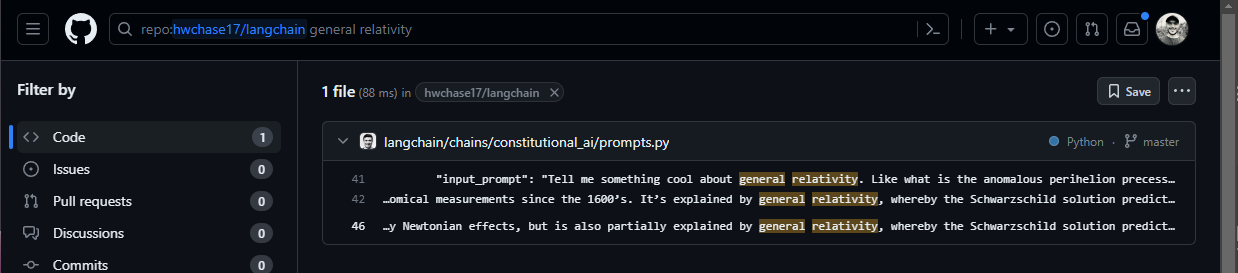

In [63]:
code = generator('write a langchain few-shot prompt template about general relativity')

In [64]:
print(code)

```python
from langchain import FewShotPromptTemplate

general_relativity_prompt = FewShotPromptTemplate(
  input_prompt="Explain general relativity as simply as possible.",
  documents=[
    "General relativity is a theory of gravity that was developed by Albert Einstein between 1907 and 1915. According to general relativity, the observed gravitational attraction between masses results from the warping of space and time by those masses.", 
    "General relativity has been described as the most beautiful of all existing physical theories. It describes gravity not as a force, but as the consequence of the curvature of spacetime caused by mass and energy.",
    "General relativity predicts that the path of light is bent in a gravitational field; light passing a star is deflected towards that star. This effect was first confirmed by Arthur Eddington from his observations during the Solar Eclipse of 29 May 1919."
  ]
)
```
